# (A) Importing relevant libraries

The following libraries/directories will be used in this notebook:

1. `numpy` for calculation of moments and correlation coefficient.
2. `pandas` for importing `.csv` files into `DataFrame` objects.
3. `matplotlib.pyplot` for plotting graphs and histograms.
4. `random` for random integer generation
5. `scipy.stats` for creating normal distributions with given mean and standard deviation.
6. `matplotlib.patches` for creating custom legends for plots, based on inputs.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.stats
import matplotlib.patches as mpatches
%matplotlib inline

# (B) Ticker symbols & clarification

Stocks used in this notebook:

`'TSLA'`: Tesla Inc

`'F'`: Ford Motor Company

`'GM'`: General Motors Company

`'HMC'`: Honda Motor Co Ltd

`'TM'`: Toyota Motor Corp

`'TTM'`: Tata Motors Ltd

##### <u> All stocks are on the NYSE, and have their prices in USD.</u>
    
Any of these can be used for the functions derived in this notebook, by using their ticker symbols as strings (i.e. within quotes).
Before using them, make sure the relevant `.csv` is in same directory as the `.ipynb`.

In [2]:
tickers_dict = {'TSLA': 'TESLA', 'F': 'FORD', 'GM': 'GENERAL MOTORS', 
                'HMC': 'HONDA', 'TM': 'TOYOTA', 'TTM': 'TATA'} # dict of ticker symbols analysed in this notebook
colours = ['r', 'g', 'c', 'b', 'saddlebrown', 'y'] # for plotting graphs later on
tickers_list = list(tickers_dict) # for easier selection of ticker symbols

# (C) Defining a synopsis function

This function will:

* Take the value of the ticker symbol as an input, 
* Import the `.csv` of the same name (assuming it is in the same directory), 
* Make the necessary preprocessing changes on it,
* Plot graphs of closing share price (adjusted, wherever applicable), and a distribution of %age return
* Calculate the first 4 moments (mean, variance, skewness, kurtosis) on the return calculated earlier.

***The choice of plotting the graphs, or getting the moments is controllable using the boolean arguments*** `shareprice`, `returns` ***and*** `num`.

The `.csv` files for this notebook have been taken from finance.yahoo.com, but any .csv will do, as long as

* the filename is the same as the ticker symbol, and 
* relevant preprocessing changes have been made.

In [3]:
def synopsis(ticker, plots = True, moments = True):
    
    path = ticker + '.csv'
    stock = pd.read_csv(path)
    stock['Return'] = stock['Adj Close'].pct_change()
    stock.drop([0], inplace = True, axis = 0)
    stock.Date = pd.to_datetime(stock.Date)
    
    if plots == True:
        plt.figure(figsize = (12, 4))
        plt.plot(stock.Date, stock['Adj Close'], c = colours[tickers_list.index(ticker)])
        plt.xlabel('Date')
        plt.ylabel(ylabel = tickers_dict.get(ticker) + ' adjusted price')
        plt.title(label = tickers_dict.get(ticker) + ' share price over 2018 (in USD)', fontdict = {'fontsize' : 25})
        plt.show()
        
        print('\n---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---\n')
        returns_sorted = sorted(stock.Return)
        norm_dist = scipy.stats.norm.pdf(returns_sorted, stock.Return.mean(), np.sqrt(stock.Return.var()))
        plt.figure(figsize = (12, 4))
        plt.plot(returns_sorted, norm_dist)
        plt.hist(stock.Return, bins = 35, color = colours[tickers_list.index(ticker)])
        plt.xlabel(xlabel = tickers_dict.get(ticker) + ' return %age')
        plt.title(label = tickers_dict.get(ticker) + ' return %age distribution', fontdict = {'fontsize' : 25})
        plt.show()

        
    
    if moments == True:
        print('\n---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---\n')
        print("Mean returns: ", stock.Return.mean())
        print("Variance of returns: ", stock.Return.var())
        print("Skewness of returns: ", stock.Return.skew())
        print("Kurtosis of returns: ", stock.Return.kurtosis())
        print("\nRange of share prices over this time period: $", stock['Adj Close'].max() - stock['Adj Close'].min(), '\n')
        print('-----------------------------------------------------------------------------------------------------')
    
    return stock

The input of this function should be the ticker symbol of the stock as a string, eg: for Tesla, the input should be: `synopsis('TSLA')`

## C-a: <u>(Very) basic sample analysis on TSLA for 2018</u>

It is quite interesting to note, that for Tesla:

* The share price rises quite a bit around Feb 2018, which is when Musk's personal Tesla Roadster was launched to space on board the Falcon Heavy.


* A Model S recall and a couple of fatal crashes in March caused a slow and inconsistent decline.


* Layoffs in June led to a steady and significant increase in the share price. Additionally, Model 3 reservations were opened to all, instead of just those holding invitations.


* Musk's statements about taking Tesla private in August caused the price to shoot, as people tried to buy into the company before it was closed off to the public. His decision to let the company stay public near the end of August, however caused a decline as people began selling their shares. Revelations about Musk's health also caused concerns among investors around this time.

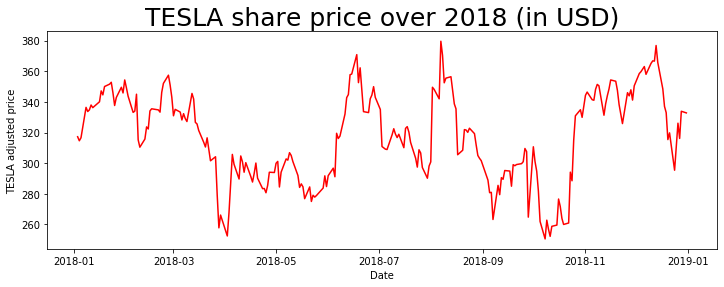


---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---



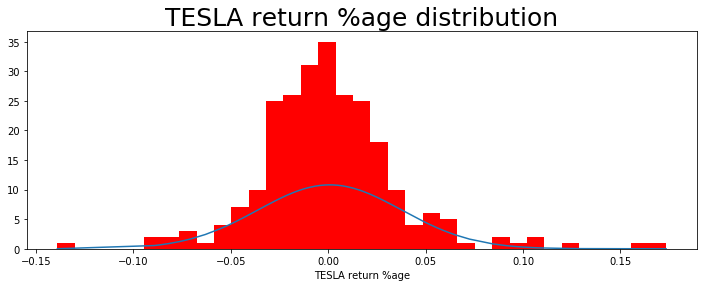


---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---

Mean returns:  0.0008177761682840621
Variance of returns:  0.0013632099305566196
Skewness of returns:  0.8262444640506406
Kurtosis of returns:  4.172527534970934

Range of share prices over this time period: $ 129.01000899999997 

-----------------------------------------------------------------------------------------------------


,Date,Open,High,Low,Close,Adj Close,Volume,Return
1,2018-01-03,321.000000,325.250000,315.549988,317.250000,317.250000,4521500,-0.010233
2,2018-01-04,312.869995,318.549988,305.679993,314.619995,314.619995,9946300,-0.008290
3,2018-01-05,316.619995,317.239990,312.000000,316.579987,316.579987,4591200,0.006230
4,2018-01-08,316.000000,337.019989,315.500000,336.410004,336.410004,9859400,0.062638
5,2018-01-09,335.160004,338.799988,327.399994,333.690002,333.690002,7146600,-0.008085
...,...,...,...,...,...,...,...,...
246,2018-12-24,313.500000,314.500000,295.200012,295.390015,295.390015,5559900,-0.076242
247,2018-12-26,300.000000,326.970001,294.089996,326.089996,326.089996,8163100,0.103930
248,2018-12-27,319.839996,322.170013,301.500000,316.130005,316.130005,8575100,-0.030544
249,2018-12-28,323.100006,336.239990,318.410004,333.869995,333.869995,9939000,0.056116


In [4]:
synopsis(ticker = 'TSLA')

## C-b: <u>Trying out the synopsis function</u>

Now try out the synopsis function. The cell below generates the synopsis of a random stock (except TSLA, of course) from the list of tickers in the beginning. Keep executing it for different results.

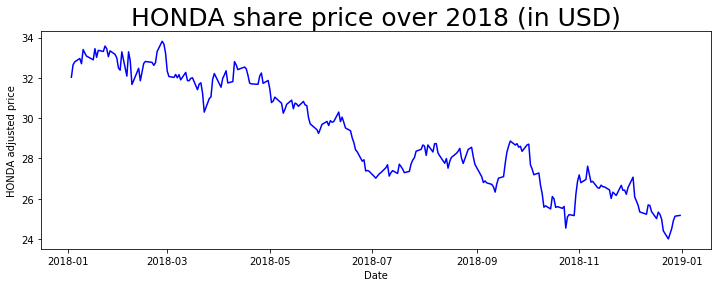


---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---



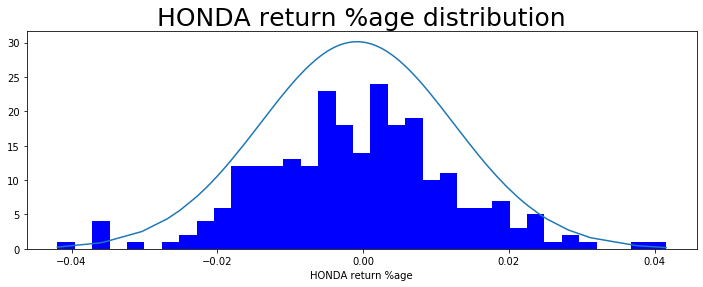


---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---

Mean returns:  -0.0008399585015608597
Variance of returns:  0.00017527130384512323
Skewness of returns:  0.002135312172212414
Kurtosis of returns:  0.5945545527766778

Range of share prices over this time period: $ 9.809659999999994 

-----------------------------------------------------------------------------------------------------


,Date,Open,High,Low,Close,Adj Close,Volume,Return
1,2018-01-03,34.439999,34.830002,34.439999,34.790001,32.030052,404200,0.008991
2,2018-01-04,35.090000,35.529999,35.060001,35.459999,32.646896,550300,0.019258
3,2018-01-05,35.580002,35.639999,35.389999,35.619999,32.794205,337400,0.004512
4,2018-01-08,35.580002,35.799999,35.580002,35.799999,32.959923,287100,0.005053
5,2018-01-09,35.639999,35.639999,35.459999,35.520000,32.702141,378100,-0.007821
...,...,...,...,...,...,...,...,...
246,2018-12-24,25.680000,25.870001,25.440001,25.469999,24.006487,610400,-0.016602
247,2018-12-26,25.600000,26.020000,25.299999,26.010000,24.515459,1076400,0.021201
248,2018-12-27,25.650000,26.190001,25.570000,26.180000,24.916277,1281300,0.016350
249,2018-12-28,26.299999,26.700001,26.170000,26.410000,25.135172,1105000,0.008785


In [5]:
synopsis(ticker = tickers_list[random.randint(1,5)])

# (D) Defining the correlation function for comparing two stocks

This function does the following things in one 'neat' package:

* Takes <b>two tickers as input</b>, and writes their historical pricing `.csv` file to two variables.


* **Normalises the pricing data according to the Min-Max scaling process**. This ensures convenient visualisation, but **doesn't affect the final correlation** calculated, since the correlation matrix scales the values anyway.


* **Plots the graphs of both unscaled and scaled prices**, and %age returns of the two stocks.


* Calculates and **displays the correlation coefficient** of (scaled) share price and %age returns.

In [6]:
def corr(ticker_1, ticker_2):
    
##### writing the .csv files as dataframes, and performing necessary preprocessing
    stock_1 = synopsis(ticker = ticker_1, plots = False, moments = False)
    stock_2 = synopsis(ticker = ticker_2, plots = False, moments = False)
    
##### applying min-max scaler on the share prices to bring them within the same bounds (i.e. 0 to 1)
    range_1 = stock_1['Adj Close'].max() - stock_1['Adj Close'].min()
    range_2 = stock_2['Adj Close'].max() - stock_2['Adj Close'].min()
    stock_1['adj_price_scaled'] = (stock_1['Adj Close'] - stock_1['Adj Close'].min())/range_1
    stock_2['adj_price_scaled'] = (stock_2['Adj Close'] - stock_2['Adj Close'].min())/range_2
        
##### creating the legend specifically for the tickers selected
    patch_share_1 = mpatches.Patch(color = colours[tickers_list.index(ticker_1)], 
                                   label = tickers_dict[ticker_1])
    patch_share_2 = mpatches.Patch(color = colours[tickers_list.index(ticker_2)], 
                                   label = tickers_dict[ticker_2])

##### plotting unscaled share prices on the same graph, for a sense of scale
    plt.figure(figsize = (18, 5))
    plt.subplot(1, 2, 1)
    plt.plot(stock_1.Date, stock_1['Adj Close'], c = colours[tickers_list.index(ticker_1)])
    plt.plot(stock_2.Date, stock_2['Adj Close'], c = colours[tickers_list.index(ticker_2)])
    plt.xlabel("Date")
    plt.ylabel("Share price in USD (unscaled)")
    plt.title(label = tickers_dict[ticker_1] + ' vs. ' + tickers_dict[ticker_2] + ' (Unscaled)', 
              fontdict = {'fontsize' : 25})
        
##### plotting the scaled adjusted share prices on the same graph, for visual comparison
    plt.subplot(1, 2, 2)
    plt.plot(stock_1.Date, stock_1.adj_price_scaled, c = colours[tickers_list.index(ticker_1)])
    plt.plot(stock_2.Date, stock_2.adj_price_scaled, c = colours[tickers_list.index(ticker_2)])
    plt.xlabel("Date")
    plt.ylabel("Share price (Min-Max scaled)")
    plt.title(label = tickers_dict[ticker_1] + ' vs. ' + tickers_dict[ticker_2] + ' (Scaled)', 
              fontdict = {'fontsize' : 25})

    plt.tight_layout()
    plt.show()
        
##### plotting the above graph for percentage returns
    plt.figure(figsize = (18, 4))
    plt.plot(stock_1.Date, stock_1.Return, c = colours[tickers_list.index(ticker_1)])
    plt.plot(stock_2.Date, stock_2.Return, c = colours[tickers_list.index(ticker_2)])
    plt.xlabel("Date")
    plt.ylabel("%age returns")
    patch_ret_1 = mpatches.Patch(color = colours[tickers_list.index(ticker_1)], 
                                 label = tickers_dict[ticker_1])
    patch_ret_2 = mpatches.Patch(color = colours[tickers_list.index(ticker_2)], 
                                 label = tickers_dict[ticker_2])
    plt.legend(handles = [patch_ret_1, patch_ret_2], bbox_to_anchor=(1.001, 1), loc='upper left', prop = {'size' : 15})
    plt.title(label = 'Return %age : ' + tickers_dict[ticker_1] + ' vs. ' + tickers_dict[ticker_2], 
              fontdict = {'fontsize' : 20})

    plt.show()
    
##### calculating correlation of stocks chosen
    corr = np.corrcoef(stock_1.adj_price_scaled, stock_2.adj_price_scaled)[0,1]
    corr_ret = np.corrcoef(stock_1.Return, stock_2.Return)[0, 1]
    print('--------------------------------------------------------------------')
    print("| The correlation of ", tickers_dict[ticker_1], " & ", tickers_dict[ticker_2], " share prices is: ", corr)
    print("| The correlation of ", tickers_dict[ticker_1], " & ", tickers_dict[ticker_2], " percentage returns is: ", corr_ret)
    print('--------------------------------------------------------------------')

## D-a: <u>Why is scaling/normalisation of share prices/index values important?</u>



So that the **visual comparison of the two values is more convenient and noticeable**. It will be very difficult to spot differences and similarities in the patterns for one share (with price ~`$500`) and the other share (valued at ~`$10` per share).<br>The absolute value of a stock becomes much more important than the subtle differences in its price, as compared to the other stock.<br><br>To that end, the **Min-Max scaling method** is used, which **centers the shareprice by its mean, and scales it by its range**, thus bringing the values consistently **between** `0` **and** `1`.

# (E) Examples of correlation of stocks:

## E-a: <u>Honda Motor Co Ltd & Tata Motors Ltd:</u>

Interestingly, the scaled and adjusted share price of these stocks is <b> very strongly correlated (~0.95) </b>. This could, in part be due to the fact that <b> they are both Asian automobile brands </b>, however, this is definitely not the full justification.

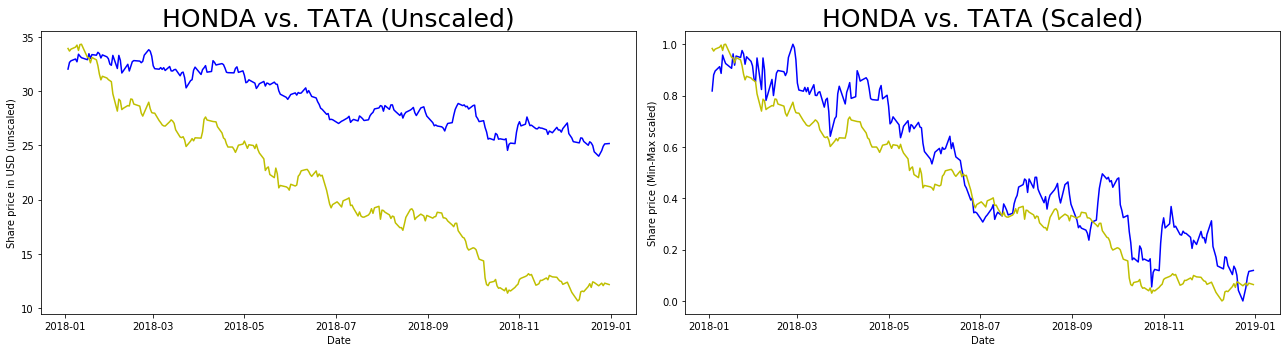

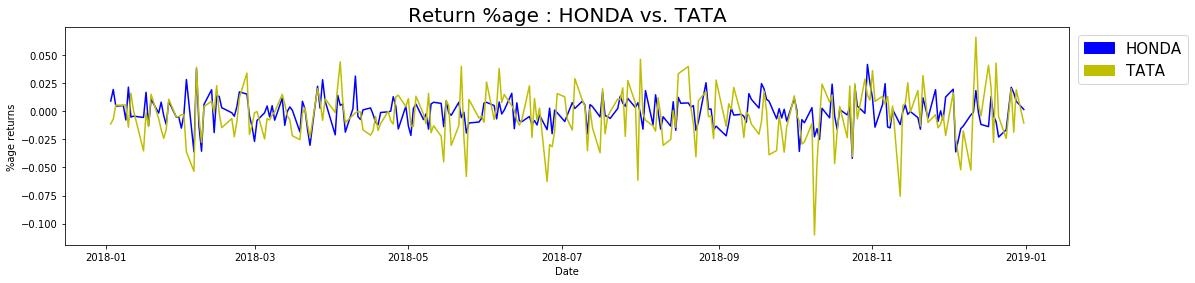

--------------------------------------------------------------------
| The correlation of  HONDA  &  TATA  share prices is:  0.9501762779894946
| The correlation of  HONDA  &  TATA  percentage returns is:  0.3903570247988634
--------------------------------------------------------------------


In [7]:
corr('HMC', 'TTM')

## E-b: <u>Toyota Motor Corp & General Motors Company:</u>

The scaled share price of these stocks is also **fairly well correlated (~0.77)**, despite their countries of origin being on opposite sides of the planet. **Correlation isn't always causation**, as we will see.

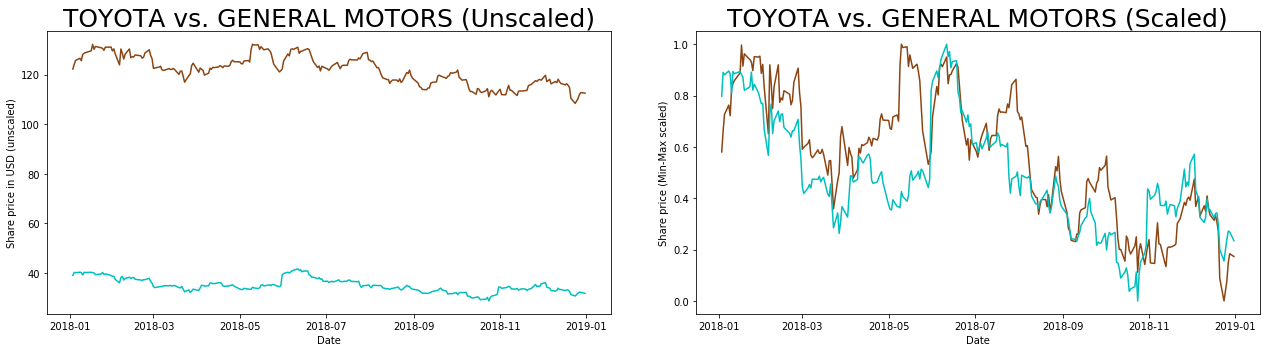

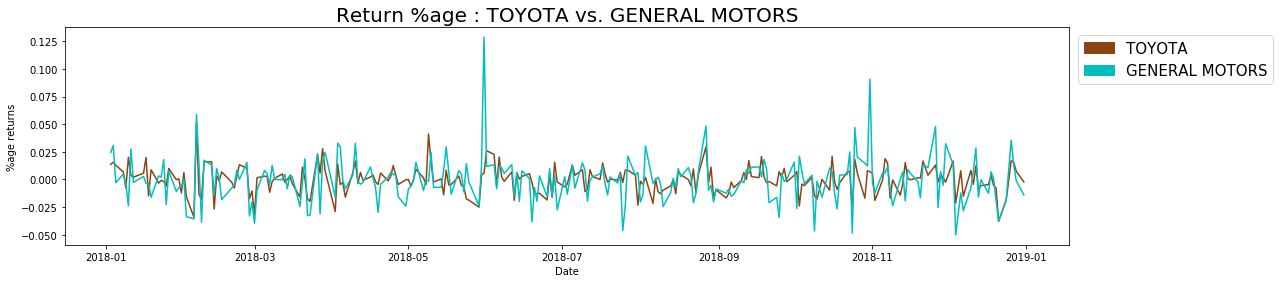

--------------------------------------------------------------------
| The correlation of  TOYOTA  &  GENERAL MOTORS  share prices is:  0.7662480416584011
| The correlation of  TOYOTA  &  GENERAL MOTORS  percentage returns is:  0.5027333951139724
--------------------------------------------------------------------


In [8]:
corr('TM', 'GM')

## E-c: <u>Tesla Inc & Honda Motor Co Ltd:</u>

There is a strong resemblance between the scaled and adjusted share prices of the first 2 quarters, as seen in the second graph. However by the end of the 4th quarter, the trend essentially reverses. Because of this, even though a decent correlation can be observed, the calculated correlation is **quite low (~0.015)**.

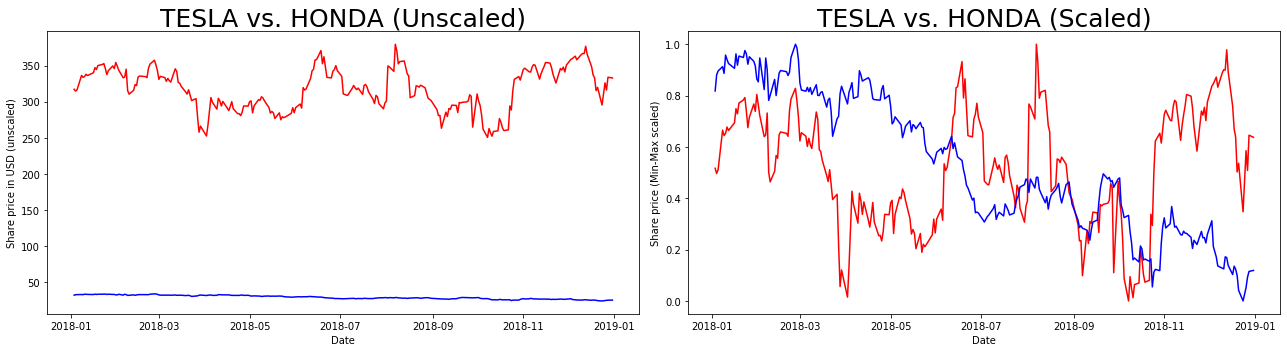

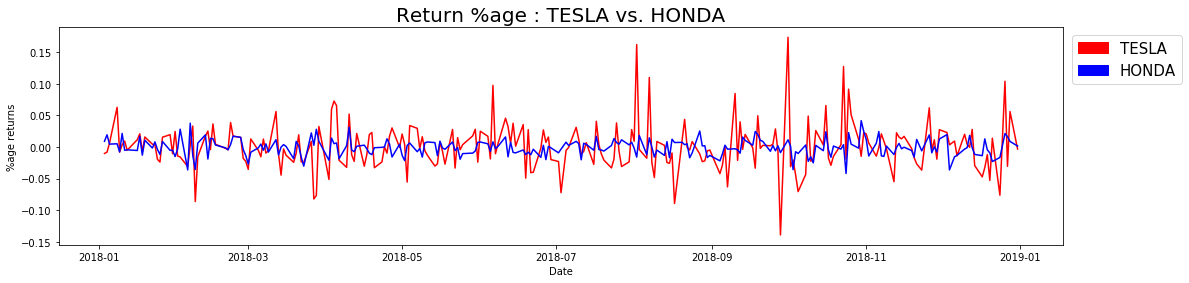

--------------------------------------------------------------------
| The correlation of  TESLA  &  HONDA  share prices is:  0.01481386835886461
| The correlation of  TESLA  &  HONDA  percentage returns is:  0.25506346300639404
--------------------------------------------------------------------


In [9]:
corr('TSLA', 'HMC')

# (F) Movement of the Auto Sector  - NASDAQ OMX Global Auto Index

The data available on the official site for this index only offers statistics upto an year back. Hence, we shall take a look at the movement of the sector within the time period **`23 August 2019`** to **`28 February 2020`.**

Additionally, we will need to check and make sure that the shapes of the dataframes constructed are consistent, and the data is scaled properly.

## F-a: <u>Defining a sector comparison function</u>

This function will:

* import and preprocess the relevant `.csv` files.
* scale the shareprice/index value within the (0, 1) range, for convenient visualisation. **This does not affect the correlation in any way.**
* calculate the correlation coefficient between the index and the share price (scaled). 

Note that upon executing `sector.shape` and `stock.shape` for the relevant stock, we find that the DataFrame for the sector index has 7 more rows than those of the stocks. This will have to be rectified within the function itself.

In [10]:
sector = pd.read_csv('NASDAQ_OMX.csv')

##### converting Date column to DateTime format
sector['Date'] = pd.to_datetime(sector['Trade Date'], dayfirst = True)
sector.drop('Trade Date', axis = 1, inplace = True)

##### reversing DataFrame to arrange in chronological order
sector = sector[::-1].reset_index()
sector.drop('index', axis = 1, inplace = True)

####################################################################################

##### definining the sector comparison function
def sector_comp(ticker):
    
##### importing .csv files into DataFrame object
    ticker_new = ticker + '_new' ##### because the .csv for this time period is stored as 'ticker_new.csv'
    stock = synopsis(ticker = ticker_new, plots = False, moments = False)
    
##### scaling via Min-max scaler for convenient visualisation
    index_range = sector['Index Value'].max() - sector['Index Value'].min()
    stock_range = stock['Adj Close'].max() - stock['Adj Close'].min()
    sector['scaled_index'] = (sector['Index Value'] - sector['Index Value'].min())/index_range
    stock['adj_price_scaled'] = (stock['Adj Close'] - stock['Adj Close'].min())/stock_range
    
##### picking rows with matching dates from both DataFrames - bit crude and lengthy, needs to be fixed.
    sector_idx = sector.set_index('Date')
    stock.set_index('Date', inplace = True)
    sector_fixed = pd.concat([sector_idx, stock], axis = 1)
    sector_fixed.dropna(axis = 0, how = 'any', inplace = True)
    sector_fixed.drop(stock.columns, axis = 1)
    sector_fixed.reset_index('Date', inplace = True)
    stock.reset_index('Date', inplace = True)
    
##### plotting the index and shareprice on the same graph
    print('Comparison of ', tickers_dict[ticker], 'with NASDAQ OMX Global Auto Index, for the time period 22nd Aug 2019 to 28th Feb 2020:')
    plt.figure(figsize = (12, 4))
    plt.plot(sector_fixed.Date, sector_fixed.scaled_index, c = 'k')
    plt.plot(stock.Date, stock.adj_price_scaled, c = colours[tickers_list.index(ticker)])
    plt.xlabel('Date')
    plt.ylabel('Index or Shareprice value (scaled)')
    plt.title(label = tickers_dict[ticker] + ' vs. Auto Sector (Global)', fontdict = {'fontsize' : 25})
    stock_patch = mpatches.Patch(color = colours[tickers_list.index(ticker)], 
                                 label = tickers_dict[ticker] + " Scaled Share Price")
    index_patch = mpatches.Patch(color = 'k', label = "Scaled Index Value")
    plt.legend(handles = [stock_patch, index_patch], bbox_to_anchor=(1.001, 1), loc='upper left', prop = {'size' : 15})
    plt.show()
    
    
##### calculating correlation coefficient
    corr_sector = np.corrcoef(sector_fixed.scaled_index, stock.adj_price_scaled)[0, 1]
    print('-----------------------------------------------------------------------------------------------------')
    print('|| The correlation coefficient of', tickers_dict[ticker], 'with the NASDAQ OMX Global Auto index is ', corr_sector, '||')
    print('-----------------------------------------------------------------------------------------------------')


## F-b: <u>Comparing chosen stocks against the sector index</u>

We run a `for` loop to iterate over the stocks in the list of tickers made in the beginning of this notebook. 



---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x

Comparison of  TESLA with NASDAQ OMX Global Auto Index, for the time period 22nd Aug 2019 to 28th Feb 2020:


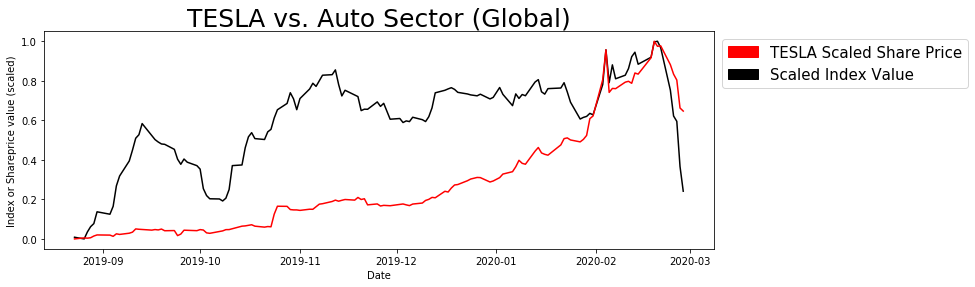

-----------------------------------------------------------------------------------------------------
|| The correlation coefficient of TESLA with the NASDAQ OMX Global Auto index is  0.641195067919565 ||
-----------------------------------------------------------------------------------------------------


---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x

Comparison of  FORD with NASDAQ OMX Global Auto Index, for the time period 22nd Aug 2019 to 28th Feb 2020:


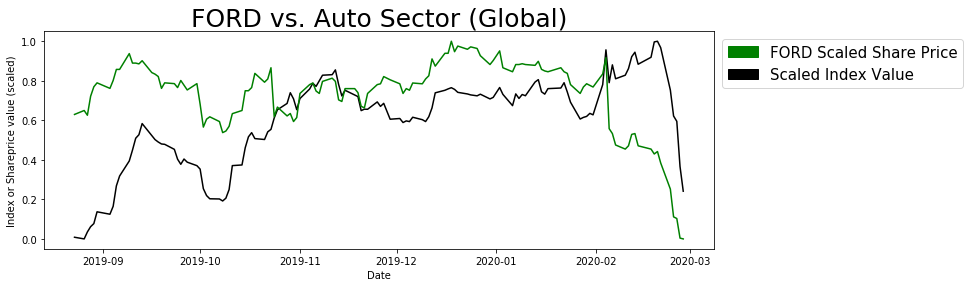

-----------------------------------------------------------------------------------------------------
|| The correlation coefficient of FORD with the NASDAQ OMX Global Auto index is  0.08632112801416547 ||
-----------------------------------------------------------------------------------------------------


---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x

Comparison of  GENERAL MOTORS with NASDAQ OMX Global Auto Index, for the time period 22nd Aug 2019 to 28th Feb 2020:


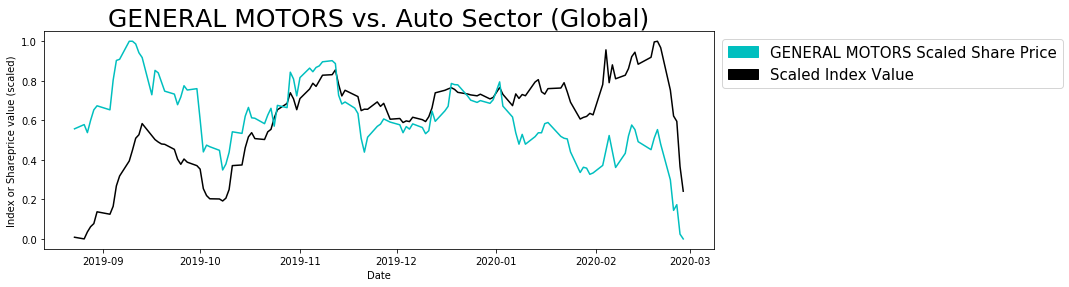

-----------------------------------------------------------------------------------------------------
|| The correlation coefficient of GENERAL MOTORS with the NASDAQ OMX Global Auto index is  0.0239625729856852 ||
-----------------------------------------------------------------------------------------------------


---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x

Comparison of  HONDA with NASDAQ OMX Global Auto Index, for the time period 22nd Aug 2019 to 28th Feb 2020:


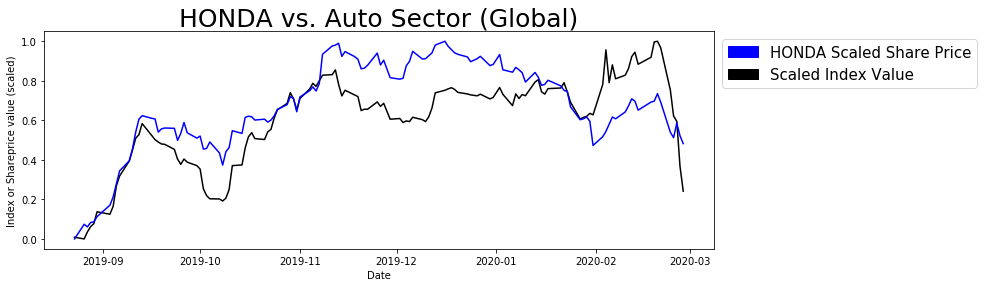

-----------------------------------------------------------------------------------------------------
|| The correlation coefficient of HONDA with the NASDAQ OMX Global Auto index is  0.77150239047289 ||
-----------------------------------------------------------------------------------------------------


---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x

Comparison of  TOYOTA with NASDAQ OMX Global Auto Index, for the time period 22nd Aug 2019 to 28th Feb 2020:


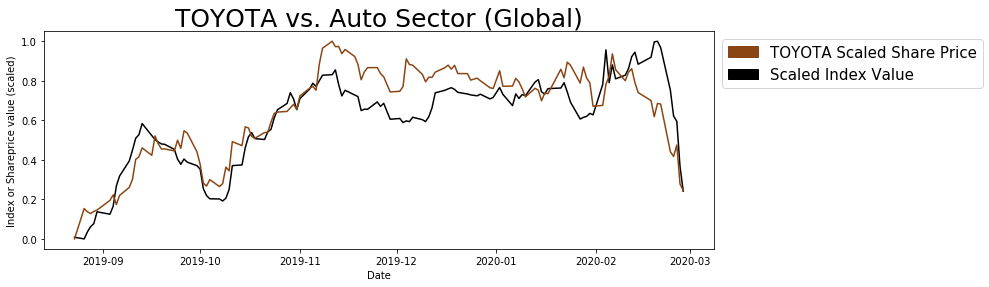

-----------------------------------------------------------------------------------------------------
|| The correlation coefficient of TOYOTA with the NASDAQ OMX Global Auto index is  0.8580785041563219 ||
-----------------------------------------------------------------------------------------------------


---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x

Comparison of  TATA with NASDAQ OMX Global Auto Index, for the time period 22nd Aug 2019 to 28th Feb 2020:


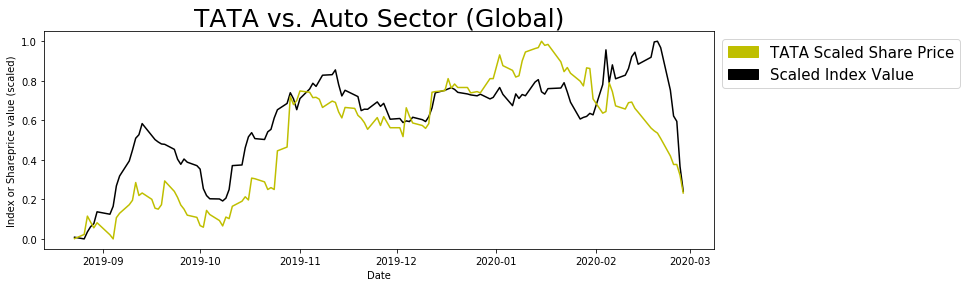

-----------------------------------------------------------------------------------------------------
|| The correlation coefficient of TATA with the NASDAQ OMX Global Auto index is  0.8195007309180844 ||
-----------------------------------------------------------------------------------------------------


In [11]:
for i in tickers_list:
    print('\n\n---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x\n')
    sector_comp(i)

Thus, in order of correlation with the Sector Index:
### `TM > TTM > HMC > TSLA >>> F > GM`

# (G) Questions:

### 1. <u>Why is variance used as a measure for risk?</u>
As is conveyed by the name, **variance denotes the 'variation' of datapoints from the average of the distribution**: <br> $$ \text{Variance }(\sigma) = \Sigma\frac{(x_{i} - \mu)^{2}}{n - 1} \text{, where } \mu = \text{mean, and } n = \text{the number of observations}.$$ <br>
    **This 'spread' of values from the mean $(\mu)$ depicts the volatility of a stock's price**, that is, how likely it is to fluctuate around the mean, and with what amplitude. With a higher volatilty, while there is a higher reward, there is also higher associated risk.


## -------------------------------------------------------------------------------
    
### 2. <u>Why does the stock return distribution not follow a normal curve?</u>
* Because of the fact that stock returns **are at the mercy of real-world factors** (and thus cannot replicate a statistical normal distribution), there are **likely to be significant tails on either side**, owing to extremely high (or low) returns during a given time period. This is **demonstrated by the graphs shown in section E** `(Examples of correlation of stocks)`, certain stocks have extreme values of %age returns on certain days.<br><br>

* For a large enough time period, there **may even be 2 or more peaks** in the stock return histogram. The graphs in this notebook don't go beyond an year in duration, but **for a period of 3+ years, there will likely be multiple peaks owing to differing trends across the years.**<br><br>

* Additionally, the **visualisation of the distribution also depends on the value of the** `bins` **parameter** in `matplotlib.pyplot.hist()`.

    
## -------------------------------------------------------------------------------
    
### 3. <u>What is the distinction between causation and correlation?</u> 
From the graphs in section E (the `corr` function), it is evident that largely similar-looking plots (section `E-c`) may not turn out to have the same correlation coefficient. This may be due to many reasons, one of them being that the trend between the two quantities being correlated flips at some point in the interval, leading to positive correlations in one sub-interval being cancelled out by negative ones in the other. This is also observed in section `F-b`, in the plot of`GENERAL MOTORS vs. Auto Sector`.

Alternatively, it may so happen that the (scaled) share prices of two stocks are indirectly related, in that certain factors are set in motion by the changes in shareprice of one stock, which reflect in the share prices of the other one as a result of another set of factors not directly related to the first stock. This is *might* be what is at play in section `E-b`, since `TOYOTA MOTORS` and `GENERAL MOTORS` may not be affected by similar laws and/or market conditions in their respective origin countries.

Finally, the shareprices of a stock may only display sufficiently strong correlation with the other stock at certain key points in the selected time period. This is clearly observed in the first plot of section `F-b`; `TSLA`'s (scaled) shareprice only seems to display a strong correlation with the sector index during the month of February 2020, and as a result of that, the overall correlation coefficient becomes **~0.64**, which paints a very different picture when looked at in an isolated manner.

Since share prices are inherently dependent on various real-world factors, and are influenced by the subjectivity of people, there is no guarantee that the single numerical metric of correlation can give a complete idea of the similarity of changing trends on two quantities. 
